In [1]:
import pathlib
import os
import numpy as np
import matplotlib.pyplot as plt

from qec_util.performance import plots, confidence_interval_binomial
from qec_util.samplers import read_failures_from_file
from surface_sim.models import SI1000NoiseModel
from lomatching import MoMatching

from bootstrap_analysis import multiround_bootstrap_plot

In [2]:
import matplotlib
import matplotlib.ticker as ticker

matplotlib.rcParams.update(
    {
        "font.size": 11,
        "font.family": "cmr10",
        "font.weight": "normal",
        'axes.unicode_minus': False,
        "axes.formatter.use_mathtext": True,
        "text.usetex": True,
        "axes.formatter.limits": (0,0),
    }
)

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

int_to_alph = {i: s for i, s in enumerate("abcdefghijklmnopqrstuvwxyz")}

In [3]:
# INPUTS
EXPERIMENTS = ["I", "H", "S", "CNOT-no-alternating", "CNOT-alternating"]
DISTANCES = [3, 5, 7]
PROBS = [
    0.0002,
    0.0005,
    0.001,
    0.00116591,
    0.00135936,
    0.00158489,
    0.00184785,
    0.002,
    0.00215443,
    0.00251189,
    0.00292864,
    0.00341455,
    0.00398107,
    0.00464159,
    0.005,
    0.0054117,
    0.00630957,
    0.00735642,
    0.00857696,
    0.01,
]
NOISE_MODEL = SI1000NoiseModel
BASES = ["Z", "X"]
FRAMES = ["pre-gate"]
DECODER = MoMatching
NUM_QEC_PER_GATE = 1

# DATA STORAGE
NAME_FORMAT = "{exp_name}_{noise_model}_{decoder}_d{distance}_b{basis}_f{frame}_s0_ncycle-{ncycle}_p{prob:0.10f}.txt"
DATA_DIR = (
    pathlib.Path(os.getcwd().replace("repeated-gate_experiments_thresholds", "repeated-gate_experiments_lom_decoder")) / "data"
)

BASIS = Z
I
Standard Error Analysis
τ_LF = (0.4360 ± 2.1222)%
Bootstrap Analysis
τ_BS  = (0.4360 ± 0.0004)%
CI_BS = (0.4356, 0.4365)%
      = (-0.0004, 0.0005)%


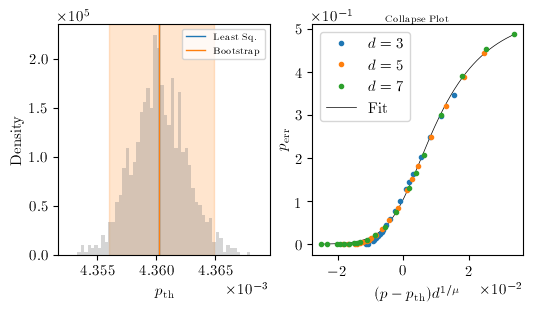

H
Standard Error Analysis
τ_LF = (0.4214 ± 2.0090)%
Bootstrap Analysis
τ_BS  = (0.4214 ± 0.0004)%
CI_BS = (0.4209, 0.4218)%
      = (-0.0005, 0.0004)%


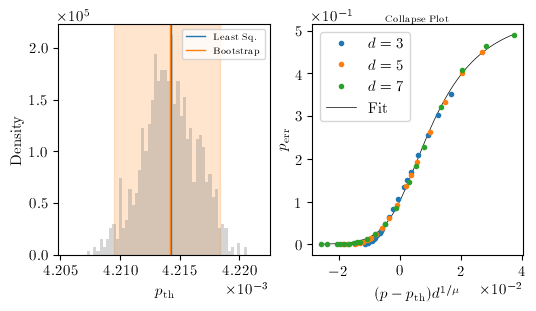

S
Standard Error Analysis
τ_LF = (0.4156 ± 2.0321)%
Bootstrap Analysis
τ_BS  = (0.4156 ± 0.0004)%
CI_BS = (0.4152, 0.4160)%
      = (-0.0004, 0.0004)%


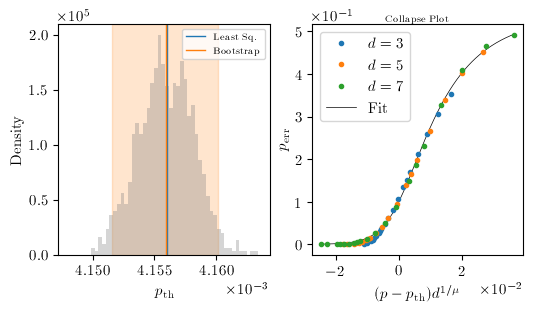

CNOT-no-alternating
Standard Error Analysis
τ_LF = (0.3275 ± 1.1057)%
Bootstrap Analysis
τ_BS  = (0.3275 ± 0.0003)%
CI_BS = (0.3272, 0.3278)%
      = (-0.0003, 0.0003)%


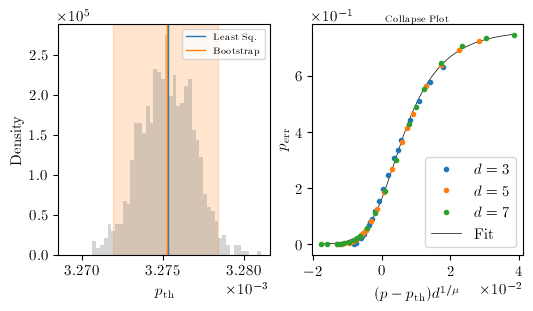

CNOT-alternating
Standard Error Analysis
τ_LF = (0.3218 ± 0.9671)%
Bootstrap Analysis
τ_BS  = (0.3218 ± 0.0003)%
CI_BS = (0.3215, 0.3221)%
      = (-0.0003, 0.0003)%


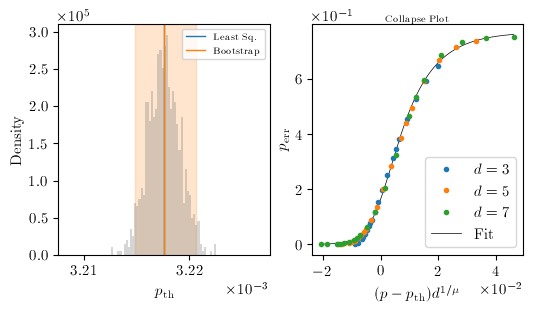

BASIS = X
I
Standard Error Analysis
τ_LF = (0.4508 ± 2.2177)%
Bootstrap Analysis
τ_BS  = (0.4508 ± 0.0004)%
CI_BS = (0.4504, 0.4512)%
      = (-0.0004, 0.0004)%


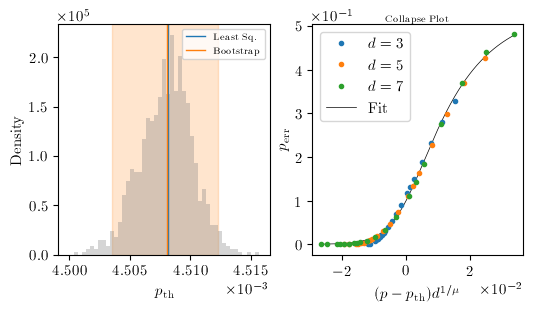

H
Standard Error Analysis
τ_LF = (0.4200 ± 2.0277)%
Bootstrap Analysis
τ_BS  = (0.4200 ± 0.0004)%
CI_BS = (0.4196, 0.4205)%
      = (-0.0004, 0.0004)%


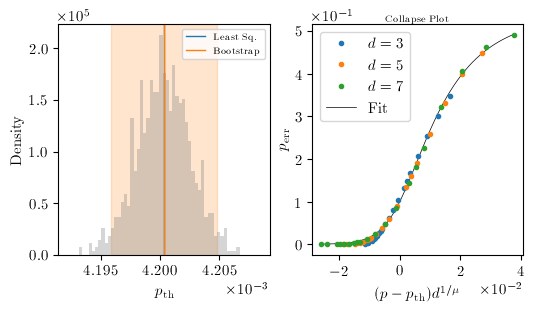

S
Standard Error Analysis
τ_LF = (0.3236 ± 1.4672)%
Bootstrap Analysis
τ_BS  = (0.3236 ± 0.0003)%
CI_BS = (0.3232, 0.3239)%
      = (-0.0003, 0.0003)%


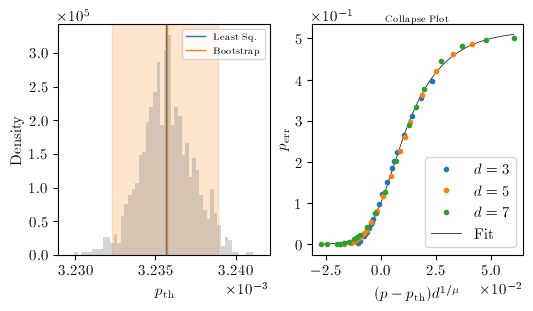

CNOT-no-alternating
Standard Error Analysis
τ_LF = (0.3398 ± 1.1471)%
Bootstrap Analysis
τ_BS  = (0.3398 ± 0.0003)%
CI_BS = (0.3395, 0.3401)%
      = (-0.0003, 0.0003)%


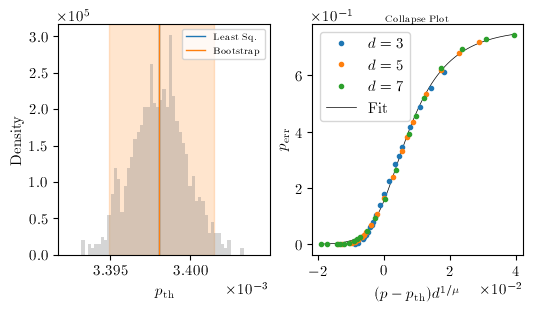

CNOT-alternating
Standard Error Analysis
τ_LF = (0.3337 ± 1.0108)%
Bootstrap Analysis
τ_BS  = (0.3337 ± 0.0003)%
CI_BS = (0.3334, 0.3340)%
      = (-0.0003, 0.0003)%


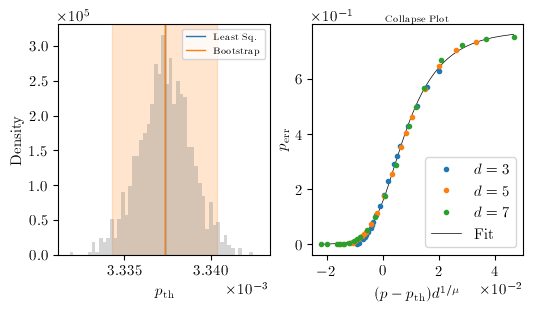

In [4]:
for basis in BASES:
    print(f"=====================\nBASIS = {basis}")
    NUM_FAILURES = np.zeros((len(EXPERIMENTS), len([basis]), len(FRAMES), len(DISTANCES), len(PROBS)))
    NUM_SAMPLES = np.zeros((len(EXPERIMENTS), len([basis]), len(FRAMES), len(DISTANCES), len(PROBS)))
    
    data_dir, decoder = DATA_DIR, DECODER
    for i, experiment_name in enumerate(EXPERIMENTS):
        for j, basis in enumerate([basis]):
            for k, frame in enumerate(FRAMES):
                for l, distance in enumerate(DISTANCES):
                    for m, prob in enumerate(PROBS):
                        file_name = NAME_FORMAT.format(
                           exp_name=experiment_name,
                           noise_model=NOISE_MODEL.__name__,
                           distance=distance,
                           basis=basis,
                           frame=frame,
                           prob=prob,                       
                           decoder=DECODER.__name__,     
                           ncycle=NUM_QEC_PER_GATE,
                        )
    
                        if not (data_dir / file_name).exists():
                            print("MISSING", data_dir / file_name)
                            continue
                        try:
                            num_failures, num_samples, extra = read_failures_from_file(data_dir / file_name)
                            NUM_FAILURES[i,j,k,l,m] = num_failures
                            NUM_SAMPLES[i,j,k,l,m] = num_samples
                        except:
                            print("BAD", data_dir / file_name)
    
    LOG_PROB = NUM_FAILURES / NUM_SAMPLES
    LOG_PROB_LOWER, LOG_PROB_UPPER = confidence_interval_binomial(NUM_FAILURES, NUM_SAMPLES)

    # "average" across all circuits 
    #(it is a weighted average because maybe the number of samples it is not the same for all of them)
    for i, exp_name in enumerate(EXPERIMENTS):
        print(exp_name)
        num_failures = NUM_FAILURES[i]
        num_samples = NUM_SAMPLES[i]
        
        # allow for only one frame and one basis
        assert num_failures.shape[:2] == num_samples.shape[:2] == (1,1)
        num_samples = num_samples[0,0]
        num_failures = num_failures[0,0]
        
        # prepare data for the code that Timo Hillmann sent me, basically it should be in
        # the shape of (num_distances, num_error_probabilities)
        ps = np.array([PROBS]*len(DISTANCES))
        ds = np.array([DISTANCES]*len(PROBS)).T
        failures = num_failures
        shots = num_samples
        rounds = -1

        filepath = pathlib.Path(f"threshold_fitting_{basis}_SI1000_{exp_name}/")
        filepath.mkdir(exist_ok=True, parents=True)
        fig, ax = plt.subplots(ncols=2, figsize=(6, 3))
        fig, ax, data = multiround_bootstrap_plot(
            ps,
            ds,
            failures,
            shots,
            rounds=rounds,
            n_samples=1000,
            filepath=filepath,
            fig=fig,
            ax=ax,
            weighted=False,
        )
        plt.show()